In [1]:
from IPython.display import display, clear_output
import keyboard
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['cmr10'],
    "axes.labelsize": 22, 
    "axes.titlesize": 25, 
    "xtick.labelsize": 22, 
    "ytick.labelsize": 22, 
    "legend.fontsize": 20,
    "figure.figsize": [12, 7], 
    "figure.dpi": 300 
})
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from keras.constraints import NonNeg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [2]:
def t_w (w, k, Omega, DeltaE, gamma, g):
    numerador = -k
    denominador = (Omega-w) - 1j * k - 1j * g**2 / (1j * (DeltaE - w) + gamma)
    t = numerador / denominador
    return abs(t)

Omega = 1

In [3]:
# Definimos una función que genere la base de datos
def Parameters_generator (num_datos):
    k = np.random.uniform(1e-4, 1e-2, num_datos)
    DeltaE = np.random.uniform(0.5, 1.5, num_datos)
    gamma = np.random.uniform(1e-4, 1e-2, num_datos)
    g = np.random.uniform(1e-4, 1e-2, num_datos)

    return k, DeltaE, gamma, g


In [4]:
def Dense_simple ():
    model = Sequential()
    model.add(Input(shape=(input_neurons,)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(output_neurons, activation='linear', kernel_constraint=NonNeg())) 

    #Compila el modelo
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model



In [5]:
# # Lista de tamaños de base de datos a probar
# num_datos_list = [100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000, 150000]

# losses = []
# training_times = []

# #Elegimos los hiperparámetros
# batch_size = 100
# epochs = 1000

# for num_datos in num_datos_list:
#     # Generar los datos de la base de datos
#     k, DeltaE, gamma, g = Parameters_generator(num_datos)
#     datos = np.column_stack((k, DeltaE, gamma, g))
#     w_values = np.linspace(0.85, 1.15, 300)
#     t_values = np.zeros((num_datos, len(w_values)))
#     for i in range(num_datos):
#         t_values[i, :] = t_w(w_values, k[i], Omega, DeltaE[i], gamma[i], g[i])

#     # Dividir los datos en entrenamiento y validación
#     x_train, x_post, y_train, y_post = train_test_split(t_values, datos, test_size=0.2)
#     x_val, x_test, y_val, y_test = train_test_split(x_post, y_post, test_size=0.5)
    
#     # Normalizamos los datos
#     scaler_x = RobustScaler()
#     x_train_norm = scaler_x.fit_transform(x_train)
#     x_val_norm = scaler_x.transform(x_val)
#     x_test_norm = scaler_x.transform(x_test)

#     scaler_y = RobustScaler()
#     y_train_norm = scaler_y.fit_transform(y_train)
#     y_val_norm = scaler_y.transform(y_val)
#     y_test_norm = scaler_y.transform(y_test)
    
#     #Número de neuronas de entrada y salida
#     input_neurons  = x_train.shape[1]
#     output_neurons = y_train.shape[1]

#     # Definir y compilar el modelo
#     model = Dense_simple()
    
#     # Entrenar el modelo y registrar el tiempo de entrenamiento
#     start_time = time.time()
#     history = model.fit(x_train_norm, y_train_norm, batch_size=batch_size, validation_data=(x_val_norm, y_val_norm),
#                         epochs=epochs, verbose=2)
#     end_time = time.time()
#     training_time = end_time - start_time
#     training_times.append(training_time)
    
#     # Evaluar el modelo en los datos de validación
#     scores = model.evaluate(x_test_norm, y_test_norm, verbose=0)
#     final_loss = scores[0]
#     losses.append(final_loss) 

# np.savetxt('losses_datasize.txt', losses)
# np.savetxt('training_times_datasize.txt', training_times)

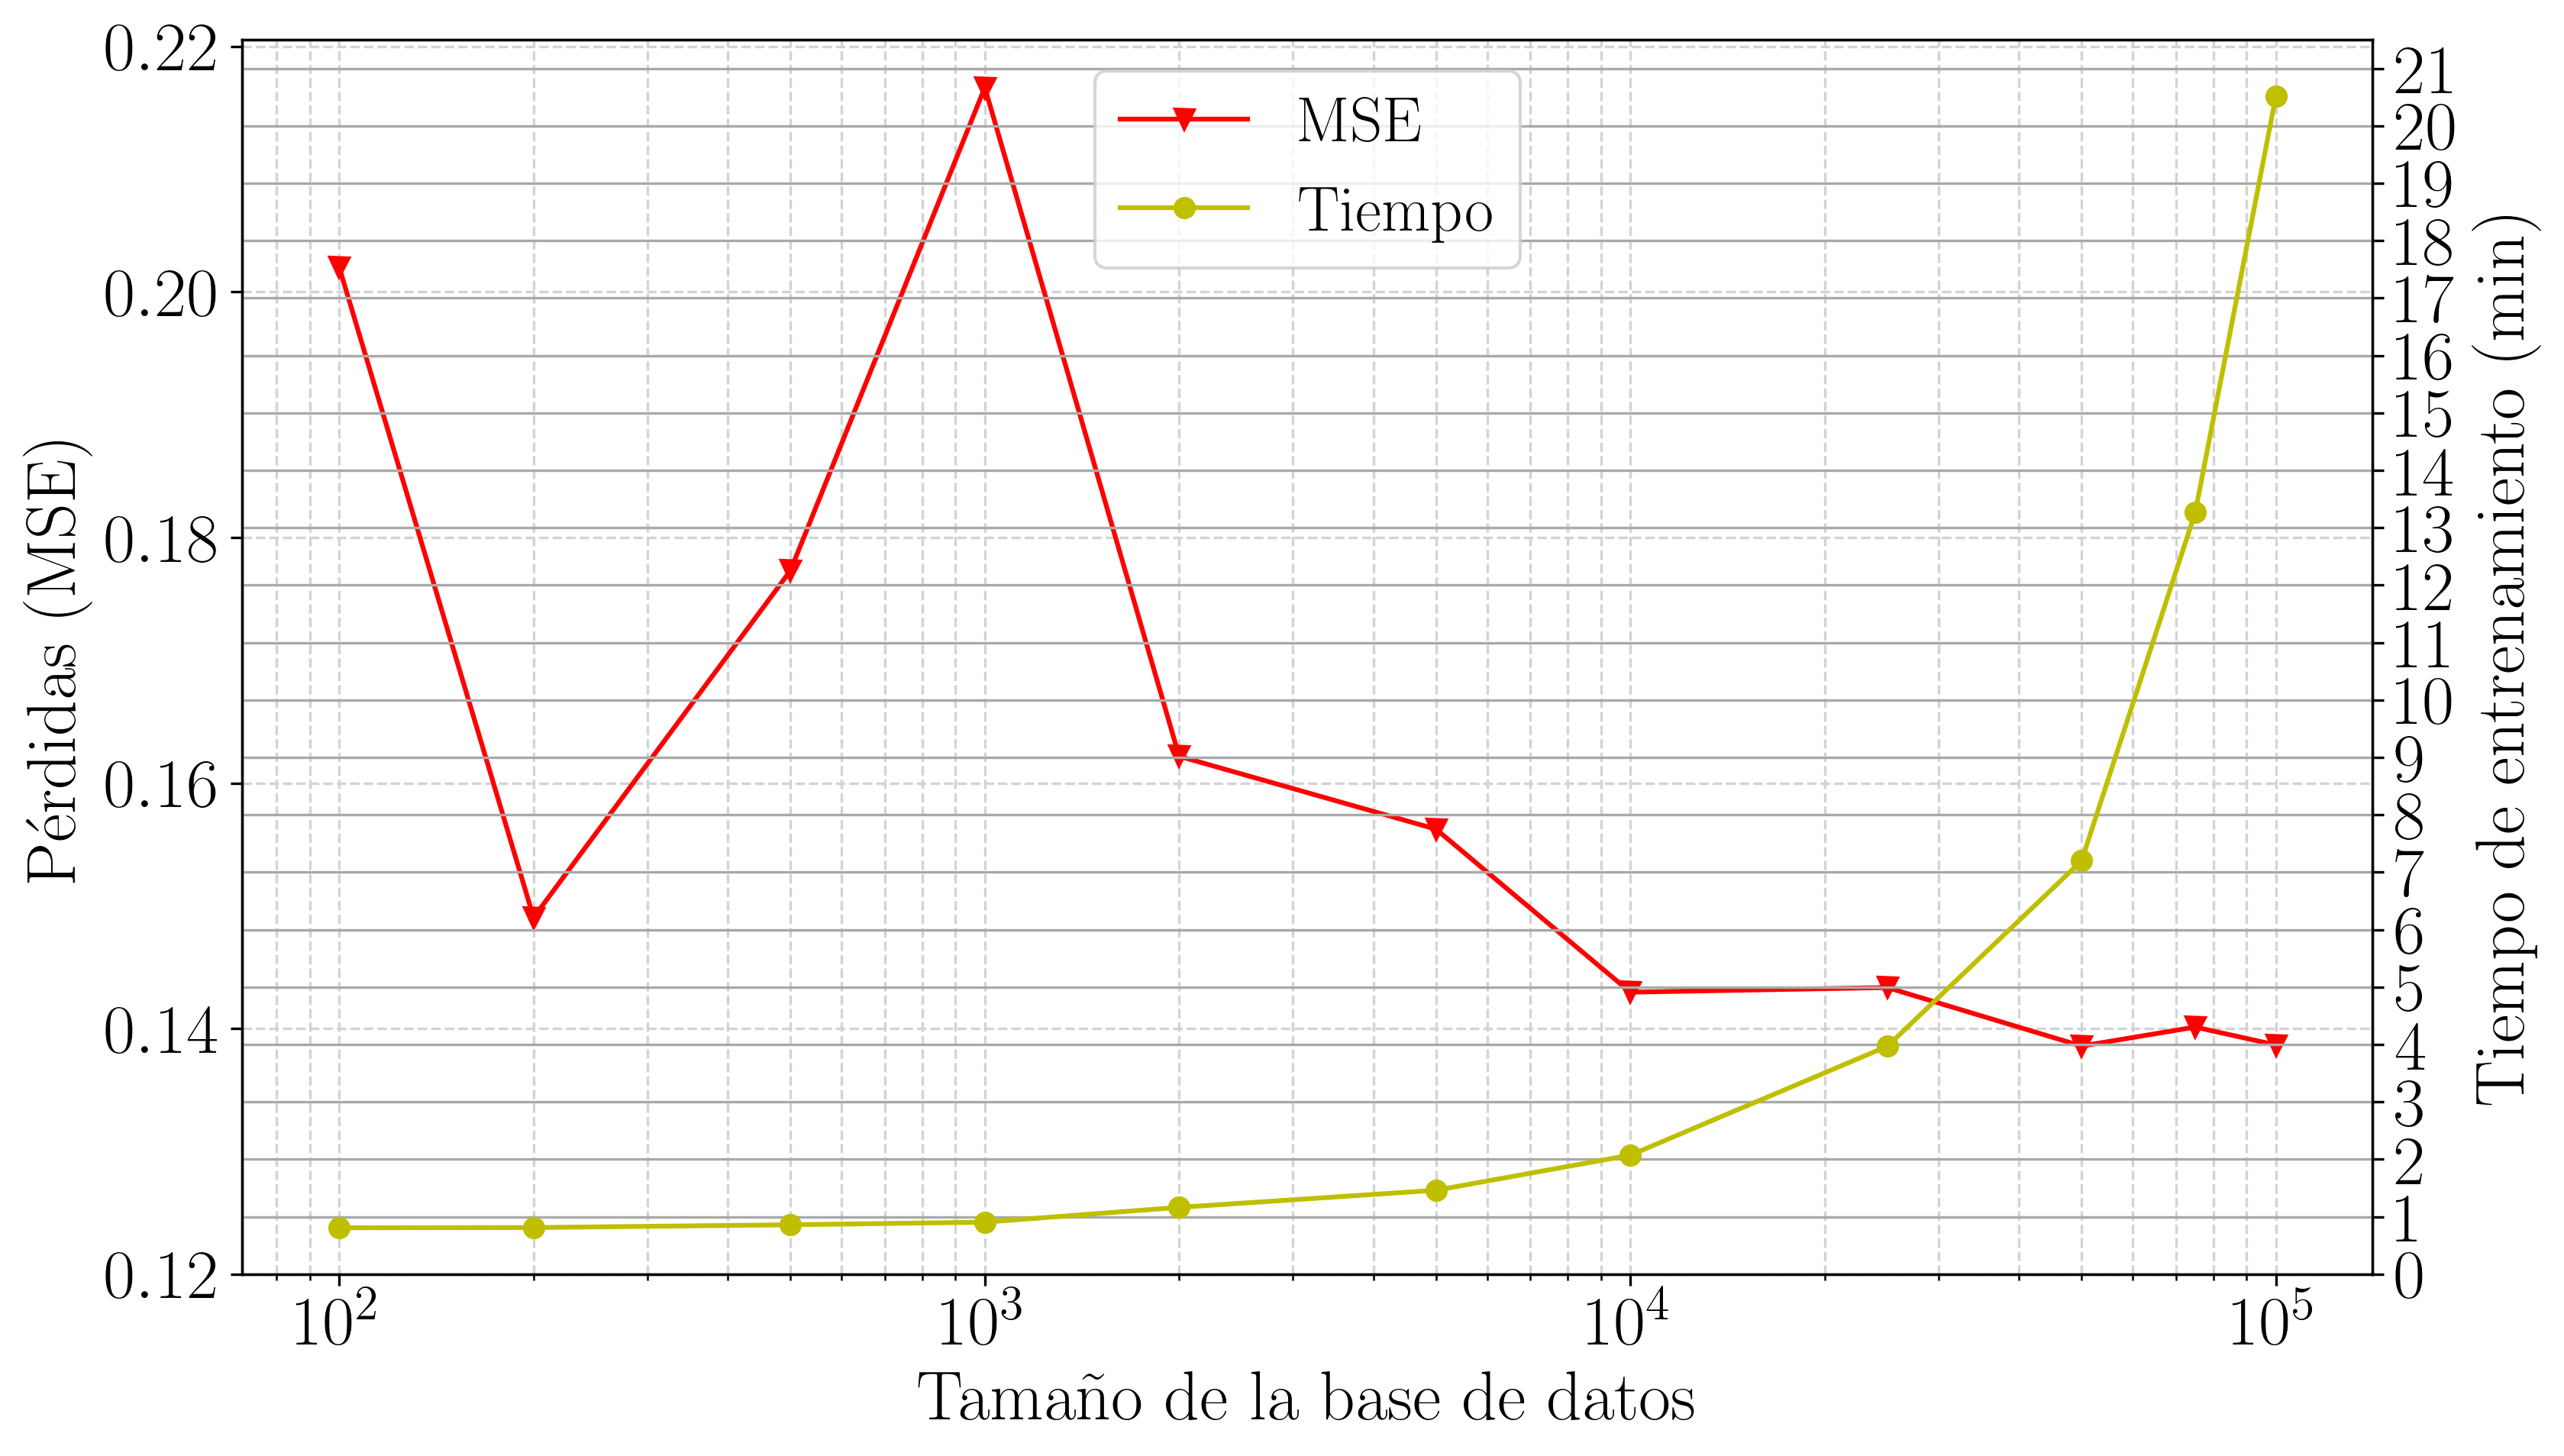

In [11]:
losses = np.loadtxt('losses_datasize.txt')
training_times = np.loadtxt('training_times_datasize.txt')

# Convertir los tiempos de entrenamiento de segundos a minutos
training_times_minutes = training_times / 60.0

# Lista de tamaños de base de datos a probar
num_datos_list = [100, 200, 500, 1000, 2000, 5000, 10000, 25000, 50000, 75000, 100000]

y_ticks = [i/50 for i in range(int(min(losses)*50), int((max(losses)*50+2)), 1)]
plt.xlabel('Tamaño de la base de datos')
plt.ylabel('Pérdidas (MSE)')
lns1 = plt.plot(num_datos_list, losses, marker='v', color='r', label='MSE')
plt.yticks(y_ticks)
plt.grid(which='both', color='lightgrey', linestyle='--')
# plt.grid(axis='x', which='both', color='lightgrey', linestyle='--')
plt.ylim(0.12)

plt.twinx()
plt.ylabel('Tiempo de entrenamiento (min)')  
lns2 = plt.plot(num_datos_list, training_times_minutes, marker='o', color='y', label='Tiempo')
yticks = [i for i in range(0, int(max(training_times_minutes))+2, 1)]
plt.yticks(yticks)
plt.ylim(0)

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='upper center')
plt.xscale('log')
plt.grid(linestyle='-', color='darkgrey')

plt.show()